In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
ts_df = pd.read_csv("cleaned_data/ts_data_clean.csv")
ts_df.head()

,Unnamed: 0,host_id,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,number_of_reviews,inventory,total_average
0,2015-06-01,1.847859e+07,37202.099174,36.161913,-86.768430,4.223140,1.433884,1.619835,2.033058,163.115702,1.859504,1.545455,889.553719,17.206612,121.0,248302.80
1,2015-07-01,1.588542e+07,37202.203096,36.157222,-86.767316,4.607430,1.492879,1.758514,2.308978,202.349226,2.161610,1.698452,838.203715,16.536223,1615.0,250573.92
2,2015-08-01,1.588542e+07,37202.203096,36.157222,-86.767316,4.607430,1.492879,1.758514,2.308978,202.349226,2.161610,1.698452,838.203715,16.536223,1615.0,252813.76
3,2015-09-01,1.588542e+07,37202.203096,36.157222,-86.767316,4.607430,1.492879,1.758514,2.308978,202.349226,2.161610,1.698452,838.203715,16.536223,1615.0,255660.52
4,2015-10-01,1.857827e+07,37201.418483,36.156564,-86.767390,4.795735,1.522275,1.800000,2.406161,200.524171,2.200000,1.747867,836.094313,17.715640,2110.0,258221.84


In [21]:
ts_df['date'] = pd.to_datetime(ts_df['Unnamed: 0'])

In [23]:
ts_df = ts_df.set_index('date')

In [26]:
ts_df.drop('Unnamed: 0', inplace=True, axis=1)

In [27]:
ts_df.index 

DatetimeIndex(['2015-06-01', '2015-07-01', '2015-08-01', '2015-09-01',
               '2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01',
               '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01',
               '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01',
               '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01',
               '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01',
               '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01',
               '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01',
               '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
               '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
               '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01',
               '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
               '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01',
               '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
      

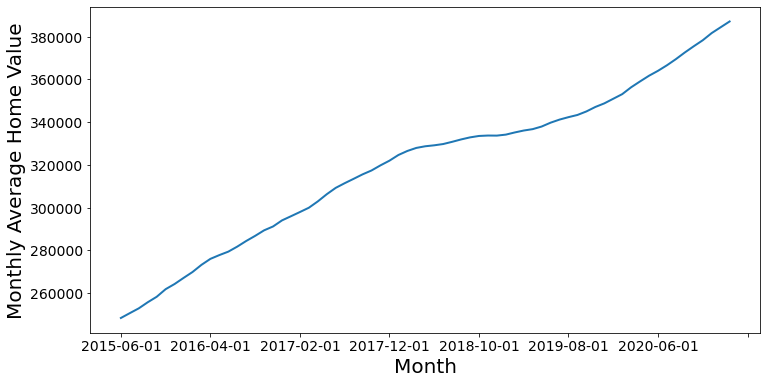

In [11]:
ts_df.total_average.plot(figsize=(12,6),linewidth=2, fontsize=14)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Monthly Average Home Value', fontsize=20);

In [12]:
roll_mean =ts_df.total_average.rolling(window=8, center=False).mean()

This appears to be an upward linear trend.

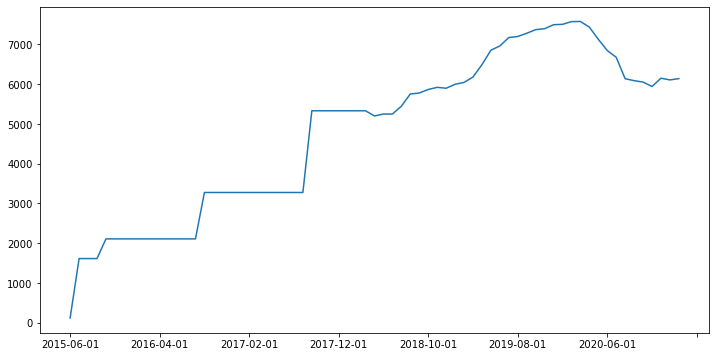

In [9]:
ts_df.inventory.plot(figsize=(12,6))

## Decomposing Home Value Series

In [28]:
series = ts_df.total_average

In [18]:
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 2015-06-01 to 2021-02-01
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   host_id            69 non-null     float64
 1   zipcode            69 non-null     float64
 2   latitude           69 non-null     float64
 3   longitude          69 non-null     float64
 4   accommodates       69 non-null     float64
 5   bathrooms          69 non-null     float64
 6   bedrooms           69 non-null     float64
 7   beds               69 non-null     float64
 8   price              69 non-null     float64
 9   guests_included    69 non-null     float64
 10  minimum_nights     69 non-null     float64
 11  maximum_nights     69 non-null     float64
 12  number_of_reviews  69 non-null     float64
 13  inventory          69 non-null     float64
 14  total_average      69 non-null     float64
dtypes: float64(15)
memory usage: 11.1+ KB


In [16]:
ts_df.total_average

2015-06-01    248302.80
2015-07-01    250573.92
2015-08-01    252813.76
2015-09-01    255660.52
2015-10-01    258221.84
                ...    
2020-10-01    375489.12
2020-11-01    378282.36
2020-12-01    381649.48
2021-01-01    384369.80
2021-02-01    387076.52
Name: total_average, Length: 69, dtype: float64

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [29]:
result = seasonal_decompose(series, model='additive')

In [30]:
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

date
2015-06-01   NaN
2015-07-01   NaN
2015-08-01   NaN
2015-09-01   NaN
2015-10-01   NaN
              ..
2020-10-01   NaN
2020-11-01   NaN
2020-12-01   NaN
2021-01-01   NaN
2021-02-01   NaN
Name: trend, Length: 69, dtype: float64
date
2015-06-01     37.855764
2015-07-01      2.265097
2015-08-01     11.361764
2015-09-01     24.166097
2015-10-01    -27.102236
                 ...    
2020-10-01    -27.102236
2020-11-01   -141.009736
2020-12-01   -188.825903
2021-01-01   -104.716903
2021-02-01    -85.290903
Name: seasonal, Length: 69, dtype: float64
date
2015-06-01   NaN
2015-07-01   NaN
2015-08-01   NaN
2015-09-01   NaN
2015-10-01   NaN
              ..
2020-10-01   NaN
2020-11-01   NaN
2020-12-01   NaN
2021-01-01   NaN
2021-02-01   NaN
Name: resid, Length: 69, dtype: float64
date
2015-06-01    248302.80
2015-07-01    250573.92
2015-08-01    252813.76
2015-09-01    255660.52
2015-10-01    258221.84
                ...    
2020-10-01    375489.12
2020-11-01    378282.36
2020-12-01    38

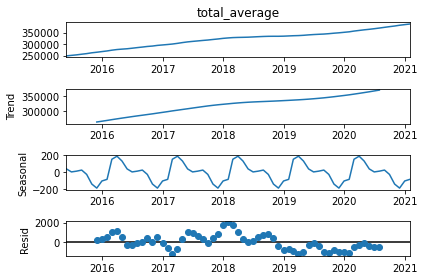

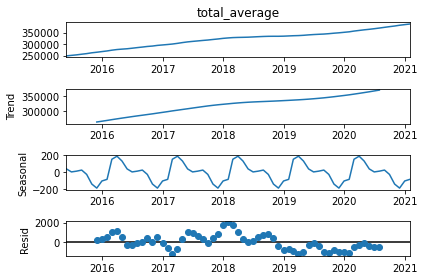

In [31]:
result.plot()

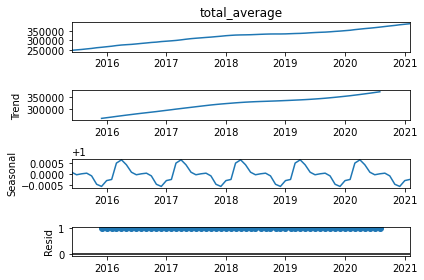

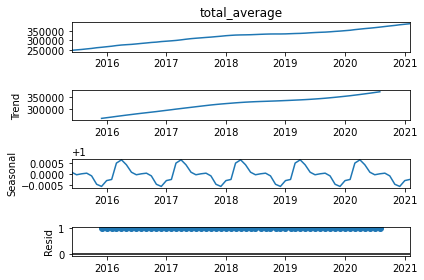

In [32]:
result_2 = seasonal_decompose(series, model='multiplicative')
result_2.plot()

In [34]:
series_diff = series.diff(periods=1)

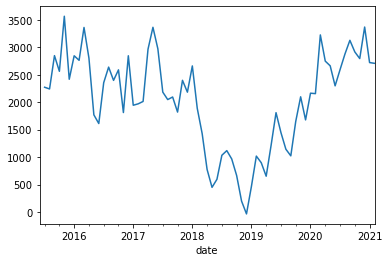

In [35]:
series_diff.plot()

In [36]:
ts_df.corr()

,host_id,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,number_of_reviews,inventory,total_average
host_id,1.000000,0.538785,0.863693,-0.692372,0.978074,-0.079532,0.600457,0.908921,0.606363,-0.048540,0.857698,-0.403114,0.981752,0.909419,0.960038
zipcode,0.538785,1.000000,0.651643,-0.633447,0.511544,0.261809,0.204277,0.463274,0.585483,0.241153,0.355687,-0.562263,0.572900,0.540272,0.398397
latitude,0.863693,0.651643,1.000000,-0.857774,0.801146,0.074601,0.426883,0.746285,0.597166,0.095911,0.637846,-0.607527,0.858906,0.801508,0.748804
longitude,-0.692372,-0.633447,-0.857774,1.000000,-0.639043,-0.081267,-0.305333,-0.595009,-0.471969,-0.140519,-0.495171,0.822394,-0.681018,-0.630287,-0.567925
accommodates,0.978074,0.511544,0.801146,-0.639043,1.000000,0.018878,0.603738,0.912790,0.620681,0.062360,0.787277,-0.314362,0.986825,0.949982,0.970906
bathrooms,-0.079532,0.261809,0.074601,-0.081267,0.018878,1.000000,-0.312461,-0.125096,0.421314,0.970158,-0.471035,0.048883,0.049412,0.265325,-0.083091
bedrooms,0.600457,0.204277,0.426883,-0.305333,0.603738,-0.312461,1.000000,0.861697,0.504491,-0.226320,0.722799,-0.118134,0.597109,0.553215,0.615909
beds,0.908921,0.463274,0.746285,-0.595009,0.912790,-0.125096,0.861697,1.000000,0.685012,-0.065872,0.844517,-0.322717,0.908780,0.855636,0.891305
price,0.606363,0.585483,0.597166,-0.471969,0.620681,0.421314,0.504491,0.685012,1.000000,0.351777,0.423484,-0.372361,0.639522,0.688971,0.522351
guests_included,-0.048540,0.241153,0.095911,-0.140519,0.062360,0.970158,-0.226320,-0.065872,0.351777,1.000000,-0.437936,0.060980,0.093645,0.314482,-0.031594


In [37]:
ts_df_diff = ts_df.diff(periods=1)

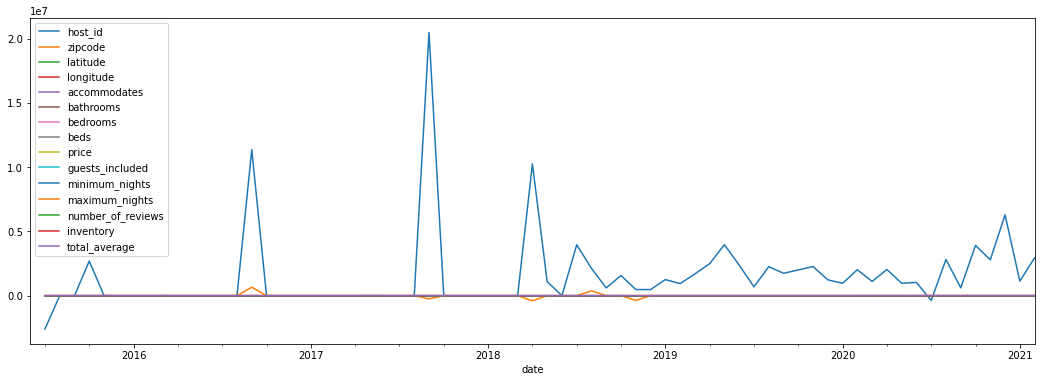

In [39]:
ts_df_diff.plot(figsize=(18,6));

In [40]:
ts_df_diff.corr()

,host_id,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,number_of_reviews,inventory,total_average
host_id,1.000000,0.041262,0.402369,-0.345044,0.529352,0.047891,0.121091,0.196341,0.095239,0.133144,0.217555,-0.049496,0.785076,0.603959,-0.073016
zipcode,0.041262,1.000000,0.019206,-0.206195,0.005736,0.067484,-0.053122,-0.062269,0.046434,0.023503,-0.055540,0.033437,0.030350,-0.006373,-0.047739
latitude,0.402369,0.019206,1.000000,-0.494768,-0.329520,-0.056311,-0.017663,-0.025787,-0.073661,-0.098225,-0.055281,-0.239121,0.204988,-0.081066,-0.134173
longitude,-0.345044,-0.206195,-0.494768,1.000000,-0.021290,-0.138268,0.135841,0.089410,0.063061,-0.188531,0.213280,0.689939,-0.142761,-0.094012,0.116577
accommodates,0.529352,0.005736,-0.329520,-0.021290,1.000000,0.060225,0.177682,0.269692,0.179593,0.182670,0.061664,0.059570,0.625420,0.732623,-0.085467
bathrooms,0.047891,0.067484,-0.056311,-0.138268,0.060225,1.000000,-0.720659,-0.665930,-0.252217,0.980343,-0.642546,-0.011492,-0.128890,0.323022,-0.123158
bedrooms,0.121091,-0.053122,-0.017663,0.135841,0.177682,-0.720659,1.000000,0.986735,0.824410,-0.678109,0.821780,0.023590,0.248396,-0.008756,0.036742
beds,0.196341,-0.062269,-0.025787,0.089410,0.269692,-0.665930,0.986735,1.000000,0.851407,-0.609938,0.800090,-0.019517,0.325669,0.051911,0.010663
price,0.095239,0.046434,-0.073661,0.063061,0.179593,-0.252217,0.824410,0.851407,1.000000,-0.227423,0.648626,-0.032581,0.124523,0.116901,-0.059075
guests_included,0.133144,0.023503,-0.098225,-0.188531,0.182670,0.980343,-0.678109,-0.609938,-0.227423,1.000000,-0.609689,-0.049952,-0.028705,0.416178,-0.119217


In [41]:
home_values = ts_df[['total_average']]

In [42]:
home_values_shift_1 = home_values.shift(periods=1)
home_values_shift_1

,total_average
date,
2015-06-01,NaN
2015-07-01,248302.80
2015-08-01,250573.92
2015-09-01,252813.76
2015-10-01,255660.52
...,...
2020-10-01,372574.40
2020-11-01,375489.12
2020-12-01,378282.36


In [43]:
lag_1 = pd.concat([home_values_shift_1, home_values], axis=1)

lag_1.corr()

,total_average,total_average
total_average,1.000000,0.999716
total_average,0.999716,1.000000


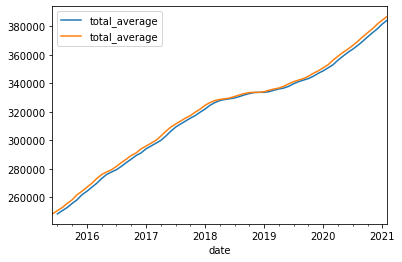

In [45]:
lag_1.plot();

In [46]:
home_values_shift_12 = home_values.shift(periods=12)
home_values_shift_12

,total_average
date,
2015-06-01,NaN
2015-07-01,NaN
2015-08-01,NaN
2015-09-01,NaN
2015-10-01,NaN
...,...
2020-10-01,344962.96
2020-11-01,347060.04
2020-12-01,348736.72


In [47]:
lag_12 = pd.concat([home_values_shift_12, home_values], axis=1)

lag_12.corr()

,total_average,total_average
total_average,1.000000,0.965114
total_average,0.965114,1.000000


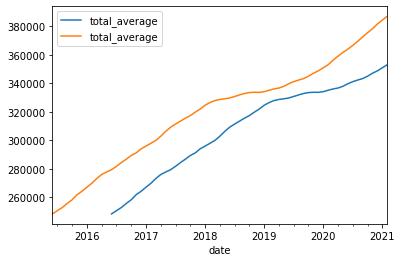

In [48]:
lag_12.plot();

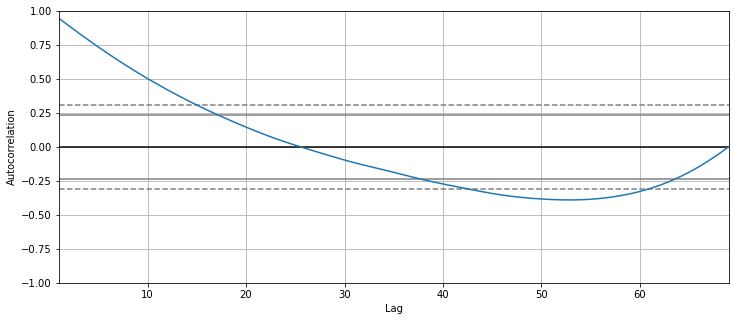

In [49]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(home_values);

C:\Users\saman\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


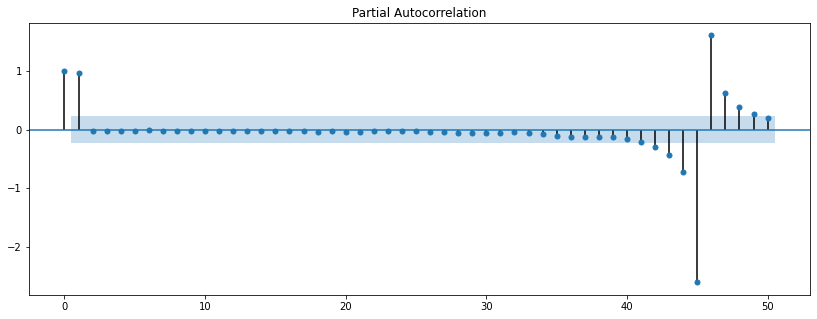

In [50]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(home_values, lags=50);

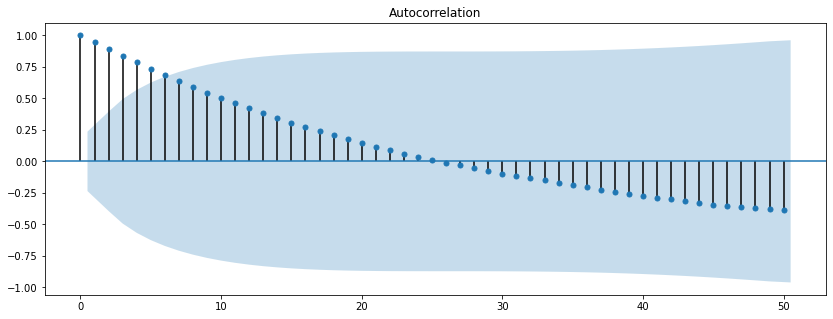

In [51]:
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_acf(home_values, lags=50);

## ARMA Model

In [58]:
home_values_diff = home_values.diff(periods=1)

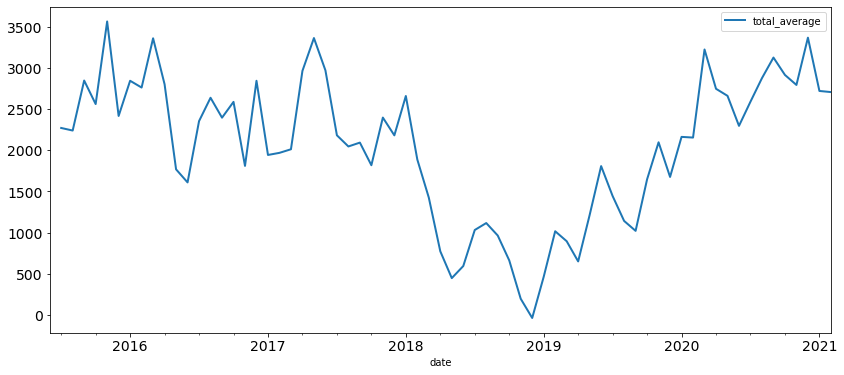

In [59]:
home_values_diff.plot(figsize=(14,6), linewidth=2, fontsize=14);

In [60]:
home_values_log =np.log(home_values)

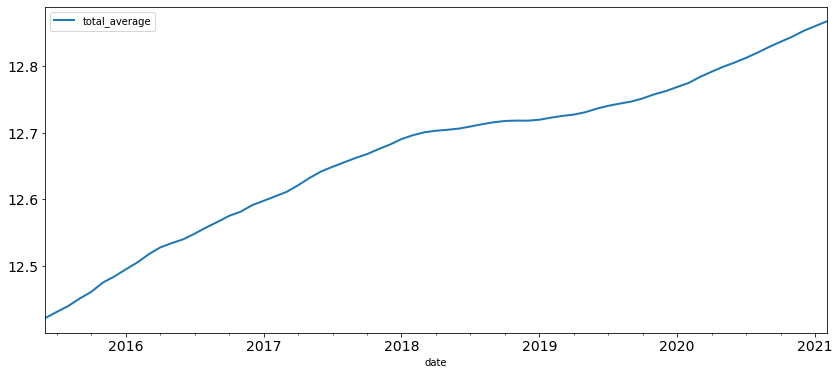

In [61]:
home_values_log.plot(figsize=(14,6), linewidth=2, fontsize=14);

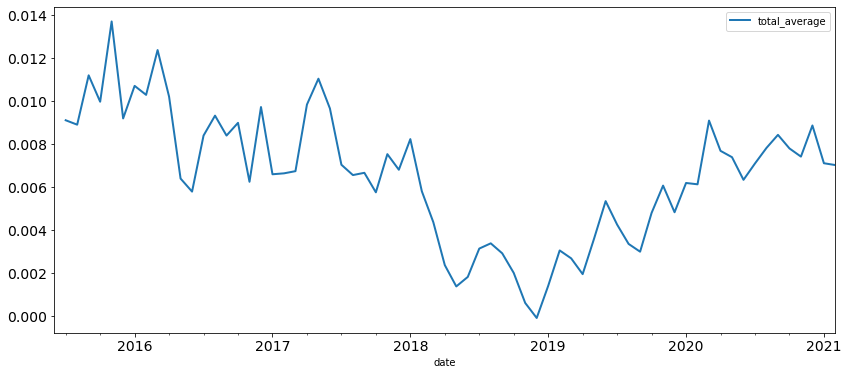

In [62]:
home_values_log_diff = home_values_log.diff(periods=1)
home_values_log_diff.plot(figsize=(14,6), linewidth=2, fontsize=14);

In [70]:
home_values_log_diff.dropna(inplace=True)

In [71]:
home_values_diff.dropna(inplace=True)

In [65]:
from statsmodels.tsa.stattools import adfuller

In [66]:
def stationarity_check(ts):
    roll_mean = ts.rolling(window=8, center=False).mean()
    roll_std = ts.rolling(window=8, center=False).std()
    fig = plt.figure(figsize=(12,7))
    plt.plot(ts, color='blue', label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    dftest = adfuller(ts)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    return dfoutput

In [73]:
adfuller(home_values)

(-0.057461158621744036,
 0.9535141627984719,
 10,
 58,
 {'1%': -3.548493559596539,
  '5%': -2.912836594776334,
  '10%': -2.594129155766944},
 846.0936277735087)

In [72]:
adfuller(home_values_diff)

(-3.0091693994208466,
 0.03404692150853294,
 11,
 56,
 {'1%': -3.552928203580539,
  '5%': -2.9147306250000002,
  '10%': -2.595137155612245},
 828.1739738839484)

In [74]:
adfuller(home_values_log_diff)

(-2.340649836438658,
 0.15919244155804468,
 11,
 56,
 {'1%': -3.552928203580539,
  '5%': -2.9147306250000002,
  '10%': -2.595137155612245},
 -591.0742711171613)

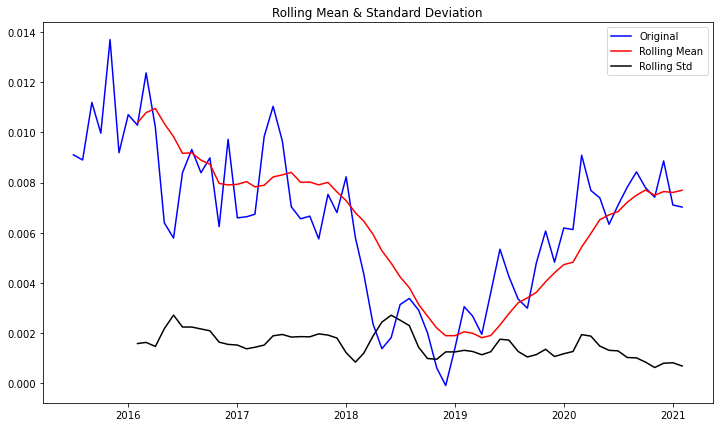

Test Statistic                 -2.340650
p-value                         0.159192
#Lags Used                     11.000000
Number of Observations Used    56.000000
dtype: float64

In [75]:
stationarity_check(home_values_log_diff)

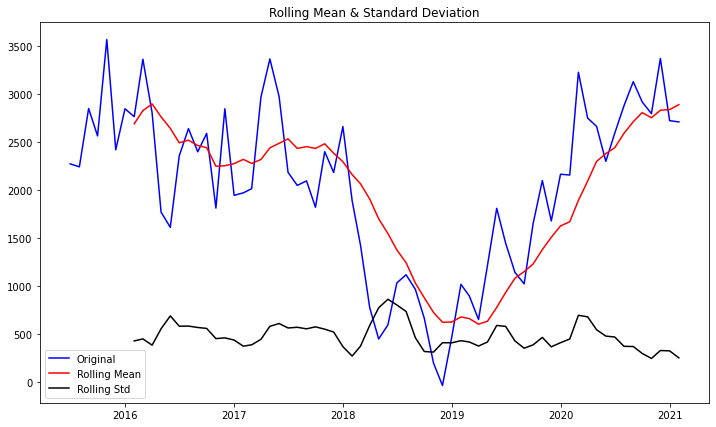

Test Statistic                 -3.009169
p-value                         0.034047
#Lags Used                     11.000000
Number of Observations Used    56.000000
dtype: float64

In [76]:
stationarity_check(home_values_diff)

In [77]:
decomposition = seasonal_decompose(home_values_diff)

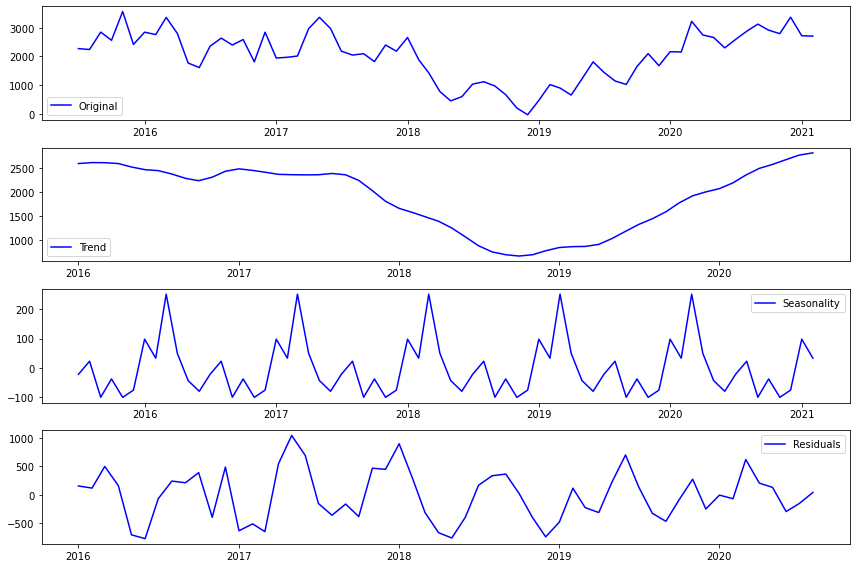

In [79]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(home_values_diff, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

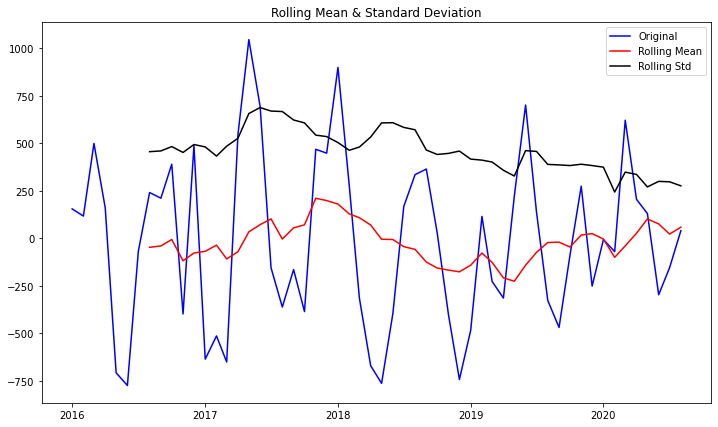

Test Statistic                 -1.889160
p-value                         0.337178
#Lags Used                      7.000000
Number of Observations Used    48.000000
dtype: float64

In [80]:
home_values_diff_decompose = residual
home_values_diff_decompose.dropna(inplace=True)
stationarity_check(home_values_diff_decompose)

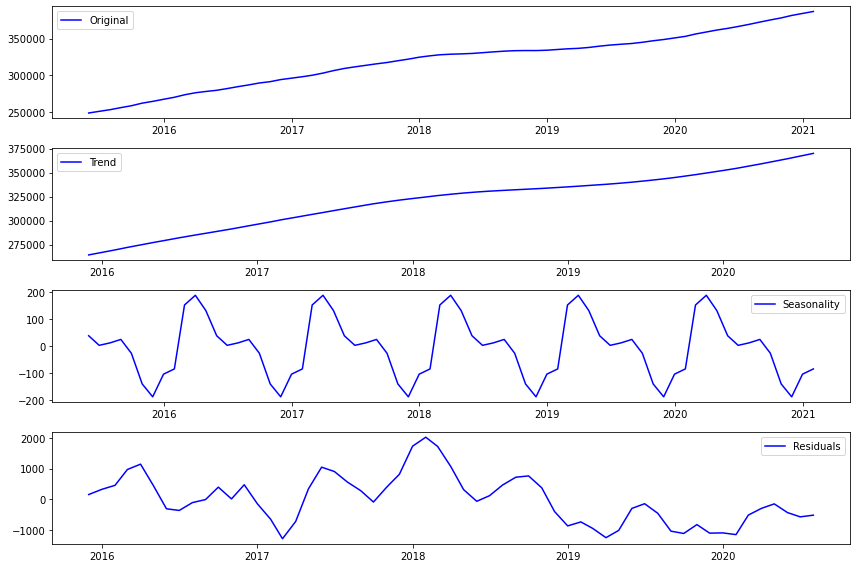

In [81]:
decomposition = seasonal_decompose(home_values)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(home_values, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

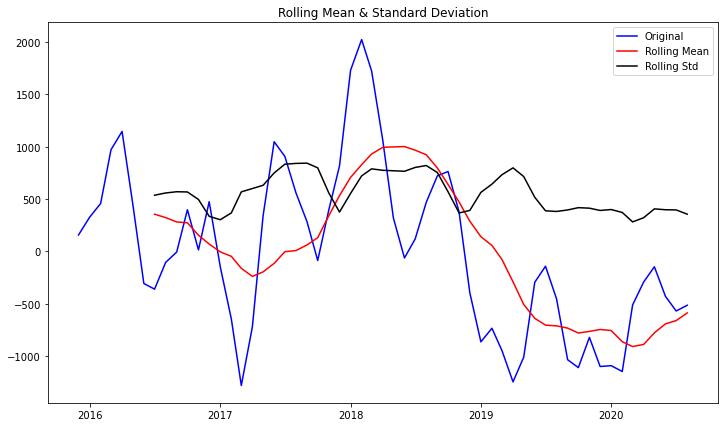

Test Statistic                 -2.419213
p-value                         0.136387
#Lags Used                      9.000000
Number of Observations Used    47.000000
dtype: float64

In [82]:
home_values_decompose = residual
home_values_decompose.dropna(inplace=True)
stationarity_check(home_values_decompose)